In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download historical stock price data for JPM (JPMorgan Chase & Co.)
ticker = 'JPM'
data = yf.download(ticker, start='2020-01-01', end='2023-11-30')

# Display the first few rows of the data
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  139.789993  141.100006  139.259995  141.089996  122.852882   
2020-01-03  137.500000  139.229996  137.080002  138.339996  121.231659   
2020-01-06  136.559998  138.270004  136.500000  138.229996  121.135277   
2020-01-07  137.279999  137.860001  135.820007  135.880005  119.075890   
2020-01-08  135.699997  137.580002  135.600006  136.940002  120.004807   

              Volume  
Date                  
2020-01-02  10803700  
2020-01-03  10386800  
2020-01-06  10259000  
2020-01-07  10531300  
2020-01-08   9695300  


In [2]:
# Calculate the fast and slow moving averages
data['Fast_MA'] = data['Close'].rolling(window=50).mean()
data['Slow_MA'] = data['Close'].rolling(window=200).mean()

# Define the trading signals based on the moving average crossover
data['Signal'] = np.where(data['Fast_MA'] > data['Slow_MA'], 1, -1)

# Calculate the daily returns of the trading strategy
data['Return'] = data['Signal'] * data['Close'].pct_change()

# Drop missing values from the dataset
data.dropna(inplace=True)

# Display the updated data
print(data.head())

                  Open        High         Low       Close  Adj Close  \
Date                                                                    
2020-10-15   99.099998  101.779999   99.040001  101.720001  91.788269   
2020-10-16  101.410004  102.330002  100.720001  101.510002  91.598770   
2020-10-19  101.599998  101.870003   99.559998   99.800003  90.055733   
2020-10-20  100.309998  101.769997  100.120003  100.370003  90.570091   
2020-10-21  100.360001  100.989998   99.330002   99.370003  89.667725   

              Volume  Fast_MA    Slow_MA  Signal    Return  
Date                                                        
2020-10-15  17171200  99.3548  104.47320      -1 -0.014967  
2020-10-16  13275000  99.4402  104.27530      -1  0.002064  
2020-10-19  11725700  99.4486  104.08260      -1  0.016846  
2020-10-20  11257100  99.4432  103.89330      -1 -0.005711  
2020-10-21  10730500  99.3542  103.71075      -1  0.009963  


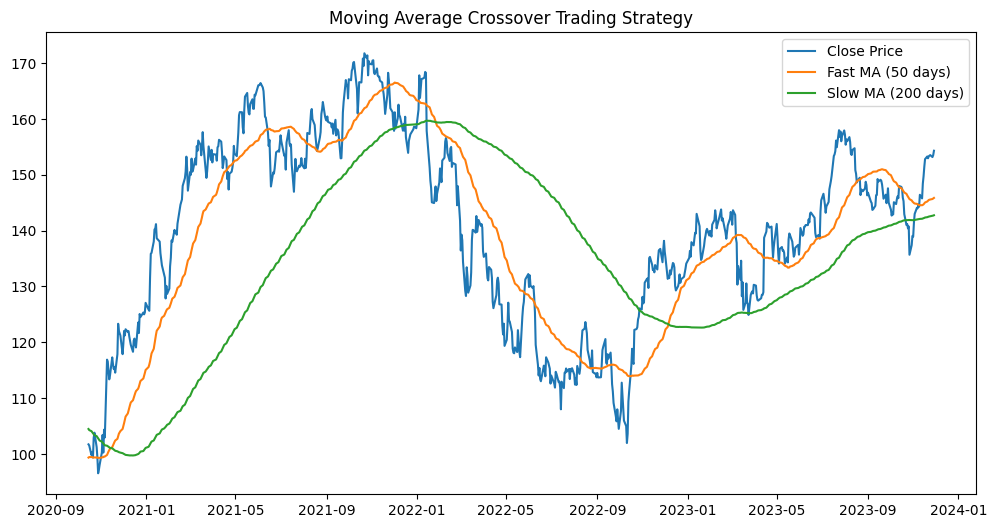

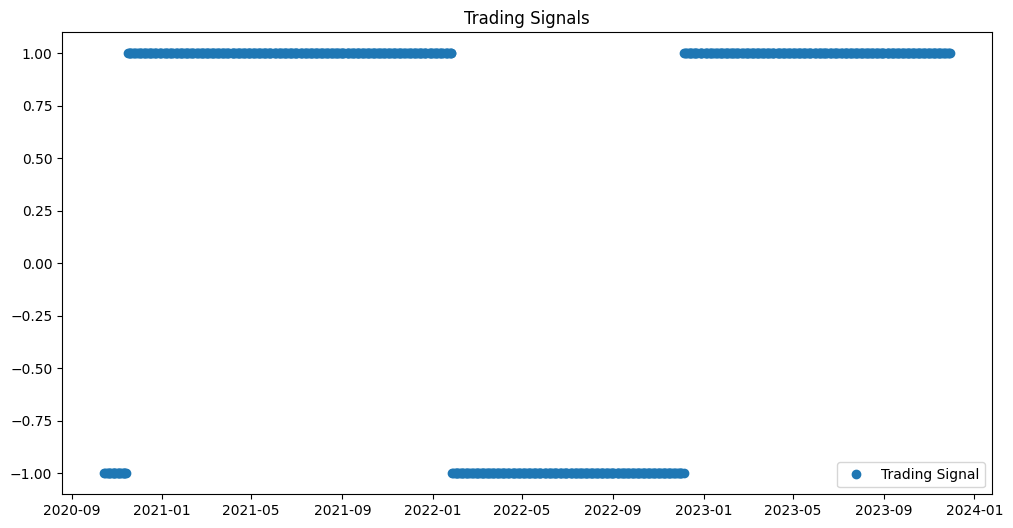

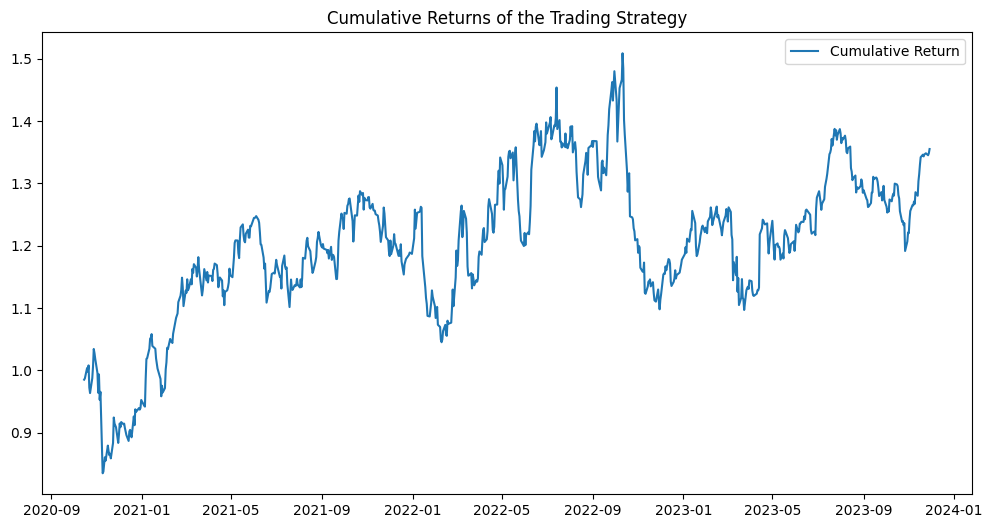

In [3]:
# Plot the stock price and the fast/slow moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Fast_MA'], label='Fast MA (50 days)')
plt.plot(data['Slow_MA'], label='Slow MA (200 days)')
plt.title('Moving Average Crossover Trading Strategy')
plt.legend()

plt.show()

# Plot the trading signals
plt.figure(figsize=(12, 6))
plt.plot(data['Signal'], label='Trading Signal', marker='o', linestyle='')
plt.title('Trading Signals')
plt.legend()

plt.show()

# Plot the cumulative returns of the trading strategy
data['Cumulative_Return'] = (1 + data['Return']).cumprod()
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Trading Strategy')
plt.legend()

plt.show()